# Exam Project Anissa, Anna, Lilo

### Welcome to our project with music label Harmonic Beats.
Led by Toby, Harmonic Beats has tasked our team with developing a model that can automatically classify audio tracks into genres based on various musical attributes. By automating this process, we hope to help Harmonic Beats offer their users an effortless way to explore and discover music that aligns with their tastes more accurately, e.g. curating playlists. 
In Milestone 1 of this project, we conducted an extensive Exploratory Data Analysis in which we took a closer look at the distribution of samples per genre as well as the distribution of each individual feature to help us identify relationships and attributes that are most significant for developing an accurate model. Milestone 1 also clearified how and why machine learning is the right approach to this task, as it able to handle complex data and offers scalability and adaptibility with increasing amount of data.
Below will show a short overview of the data, since detailed EDA was previously conducted.  


In [1]:
# import the necessary libaries
import pandas as pd
import numpy as np 

In [2]:
# load the data set
songs_data = pd.read_csv("../exam/data/songs_data.csv")

## Data Overview and summary of EDA

In [3]:
# Here we generate an overview to get familiar with the data
# summary of Exploratory Data Analysis as conducted in Milestone 1 of exam project 

In [4]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [5]:
songs_data.shape

(32833, 19)

In [6]:
songs_data.genre.value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

### Breakdown into Gernres

In [7]:
# for visualization purposes

In [8]:
rock_data = songs_data[songs_data.genre == "rock"]

In [9]:
pop_data = songs_data[songs_data.genre == "pop"]

In [10]:
rap_data = songs_data[songs_data.genre == "rap"]

In [11]:
latin_data = songs_data[songs_data.genre == "latin"]

In [12]:
rnb_data = songs_data[songs_data.genre == "r&b"]

In [13]:
edm_data = songs_data[songs_data.genre == "edm"]

## 1. Data Cleaning

After having explored the data, the second step to building a successful model is to remove missing values and redundant data. This will help ensure that the classification will be more accurate and not skew the results.


### check for any missing data

In [14]:
# As part of the data cleaning we will check for any missing values in our dataset

In [15]:
songs_data.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [16]:
# we realize there are five values missing in columns "track_name" and "track_artisit"
# since these values fall under categories that we define as non-essential for genre classification (see below) there is no need to drop them


### check for duplicates

In [17]:
# removing redundant data

In [18]:
songs_data.duplicated().sum()

323

In [19]:
print(songs_data.shape)
songs_data_cleaned = songs_data.drop_duplicates()
print(songs_data_cleaned.shape)


(32833, 19)
(32510, 19)


### Identifying Irrelevant Features

By retaining only essential features, we allow the model to focus on characteristics we define as essential to genre classification. 


In [20]:
# werent sure about duration 
# we thought that it could be quite useful for genre classification 
# because certain genres tend to have typical song lengths (e.g. rock songs typically longer than pop songs)
# we visualized each genre's duration to decide if it has meaningful correlation with genre


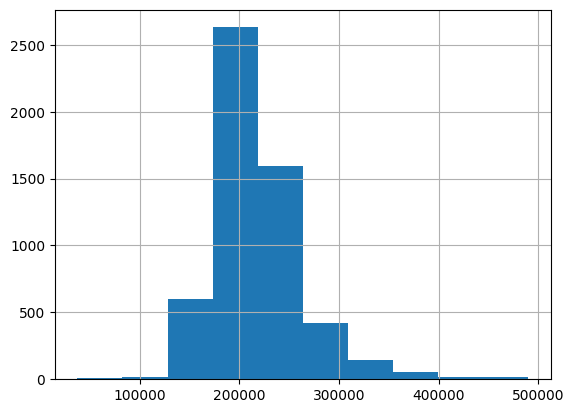

In [21]:
pop_data.duration_ms.hist();

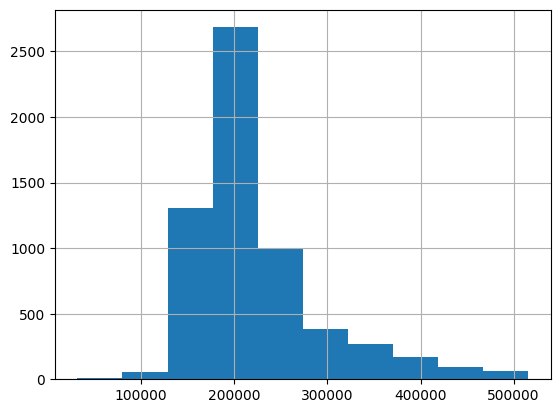

In [22]:
edm_data.duration_ms.hist();

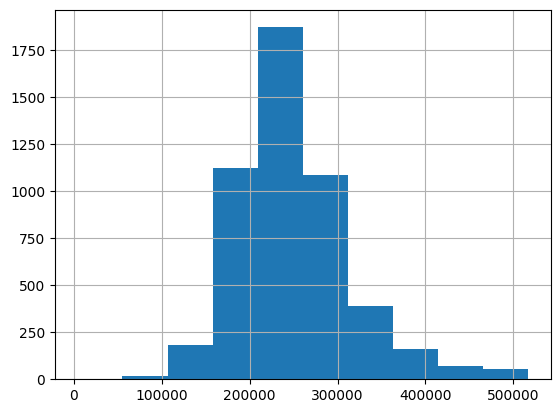

In [23]:
rock_data.duration_ms.hist();

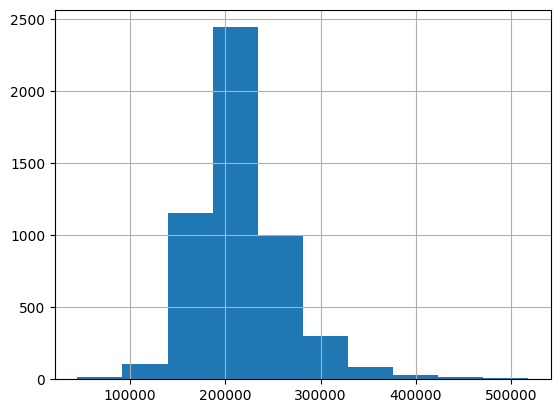

In [24]:
latin_data.duration_ms.hist();

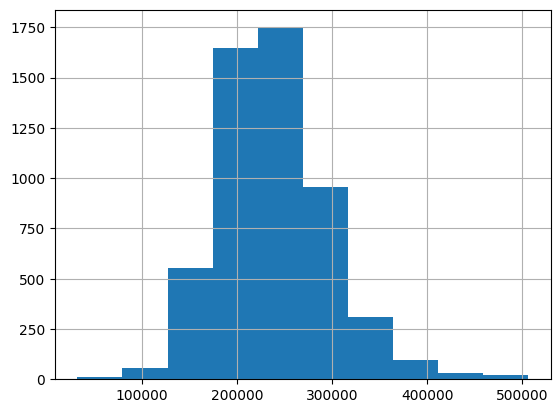

In [25]:
rnb_data.duration_ms.hist();

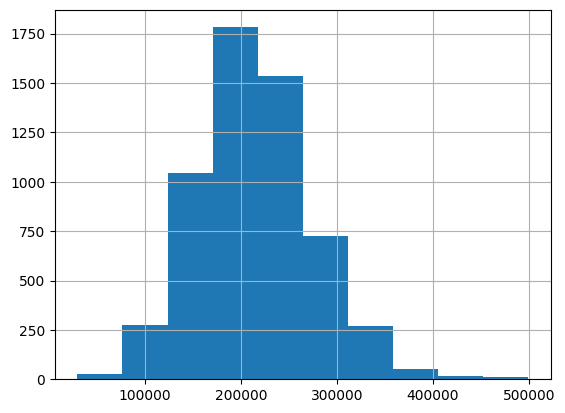

In [26]:
rap_data.duration_ms.hist();

In [27]:
# differences are not huge but still significant so decided to keep duration_ms

### Dropping non-essential features

After eploring the data, we decided to drop track_name, track_id, track_artist and playlist_id as they only provide non-essential meta data. Mode and Key did also not prove to deliver important insights, as their values were not varied enough make telling distinctions between genres.

In [28]:
songs_data_cleaned = songs_data.drop(columns=['track_name', 'track_id', 'track_artist',  'playlist_id','mode','key'])

In [29]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  32833 non-null  int64  
 1   playlist_name     32833 non-null  object 
 2   genre             32833 non-null  object 
 3   danceability      32833 non-null  float64
 4   energy            32833 non-null  float64
 5   loudness          32833 non-null  float64
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
 12  duration_ms       32833 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 3.3+ MB


In [30]:
print(songs_data_cleaned.shape)

(32833, 13)


## remove outliers

We removed outliers to improve the model’s accuracy by focusing on typical values across genres.

In [31]:
# check every characteristc for outliers and remove them

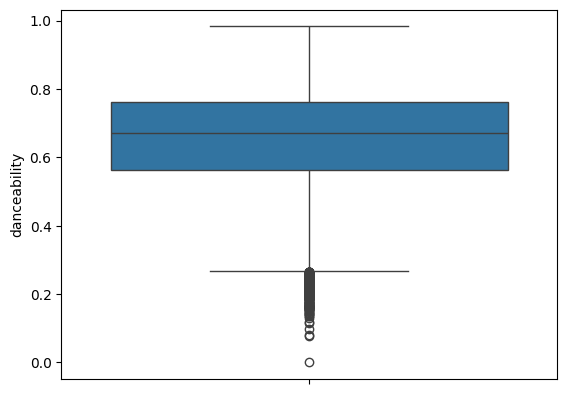

In [32]:
import seaborn as sns
#distribution of danceability
sns.boxplot(y=songs_data_cleaned.danceability);

In [33]:
# remove outliers
# reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['danceability'] > 0.28]

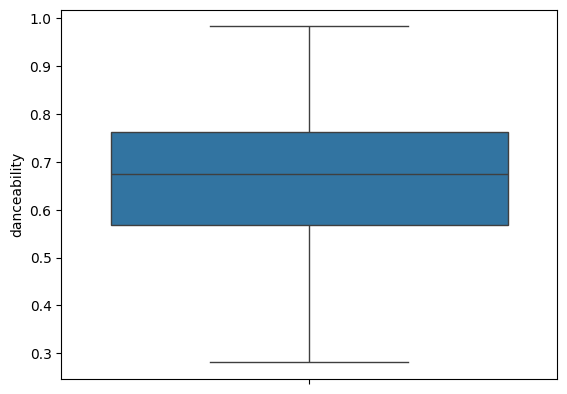

In [34]:
sns.boxplot(y=songs_data_cleaned.danceability);

In [35]:
print(songs_data_cleaned.shape)

(32436, 13)


In [36]:
#repeat for the other categories


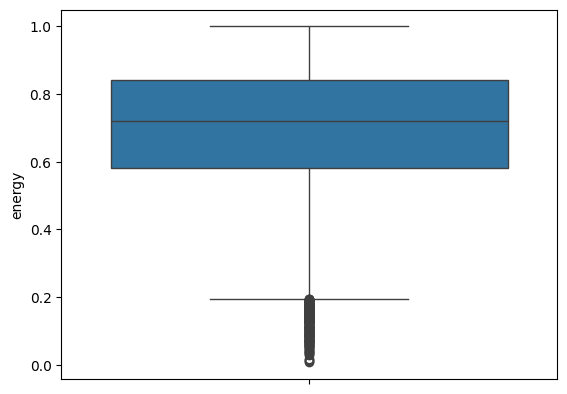

In [37]:
sns.boxplot(y=songs_data_cleaned.energy);

In [38]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['energy'] > 0.21]

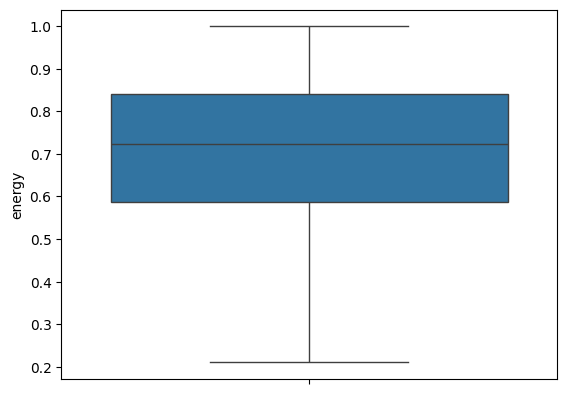

In [39]:
sns.boxplot(y=songs_data_cleaned.energy);

In [40]:
print(songs_data_cleaned.shape)

(32111, 13)


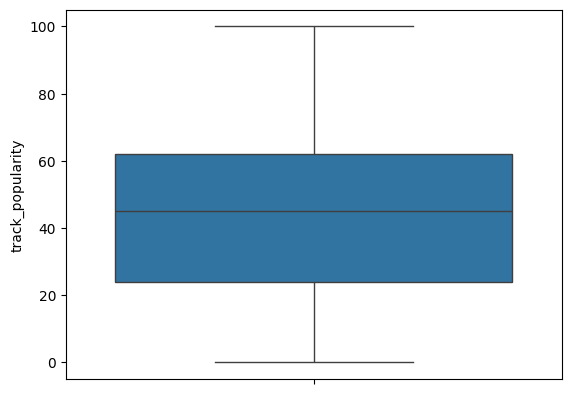

In [41]:
sns.boxplot(y=songs_data_cleaned.track_popularity);

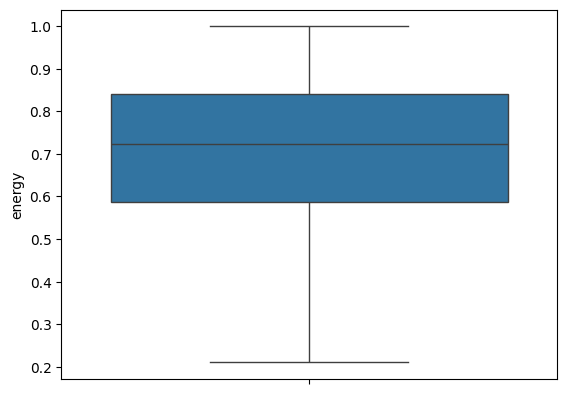

In [42]:
sns.boxplot(y=songs_data_cleaned.energy);

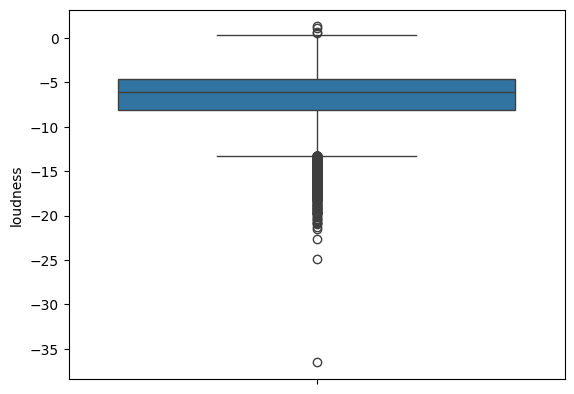

In [43]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [44]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] > -12.5]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] < 0]

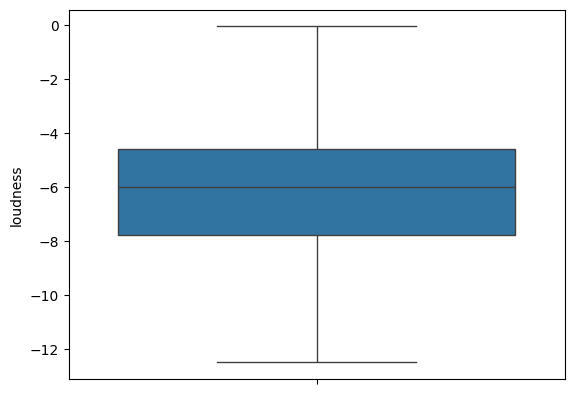

In [45]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [46]:
print(songs_data_cleaned.shape)

(30785, 13)


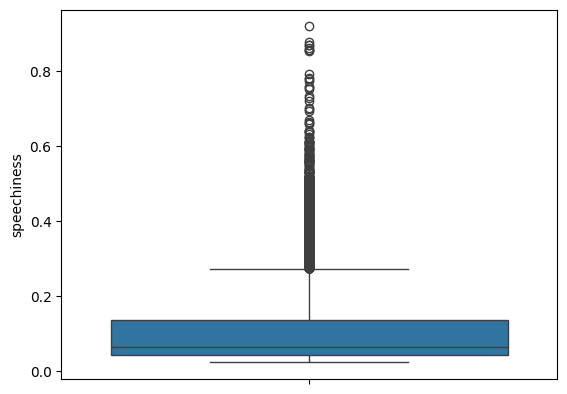

In [47]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [48]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['speechiness'] < 0.25]

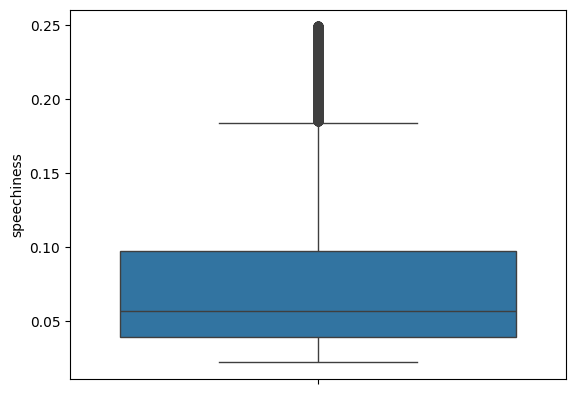

In [49]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [50]:
print(songs_data_cleaned.shape)

(27253, 13)


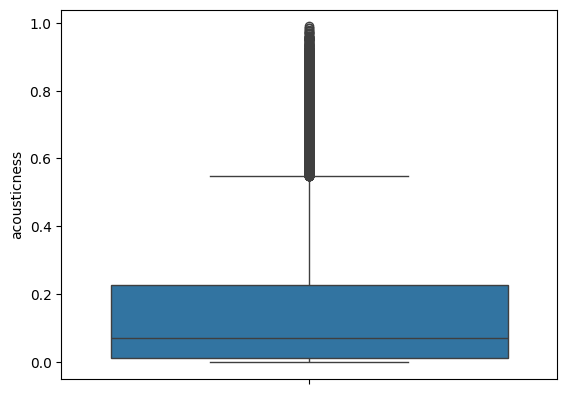

In [51]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [52]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['acousticness'] < 0.5]

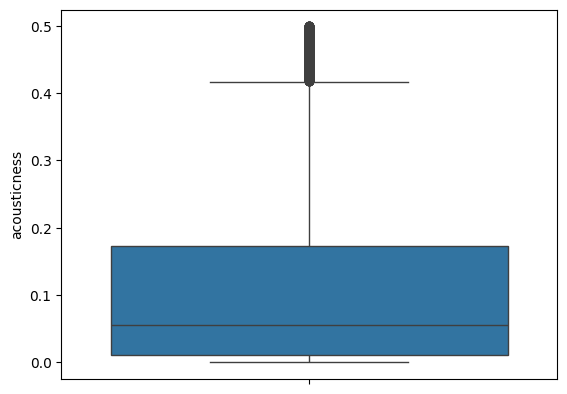

In [53]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [54]:
print(songs_data_cleaned.shape)

(24887, 13)


In [55]:
# getting rid of instrumentalness and liveness outliers would mean losing too much data

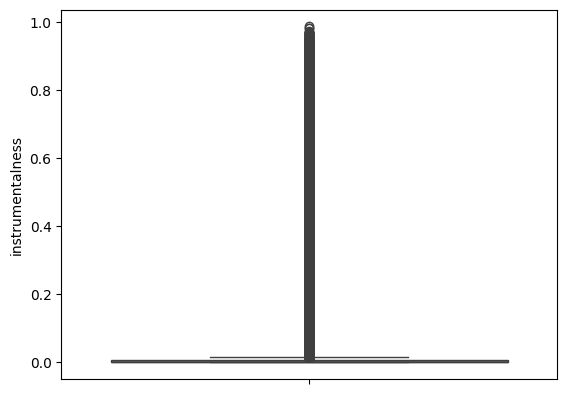

In [56]:
sns.boxplot(y=songs_data_cleaned.instrumentalness);

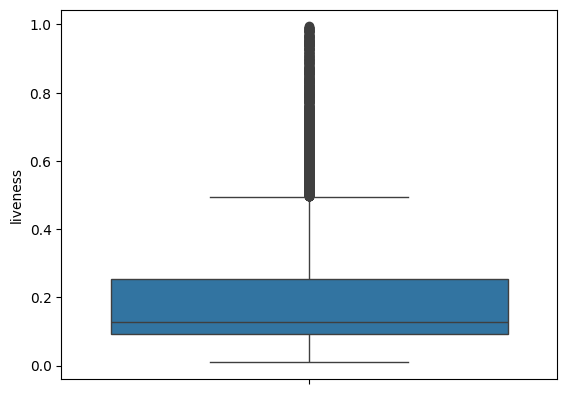

In [57]:
sns.boxplot(y=songs_data_cleaned.liveness);

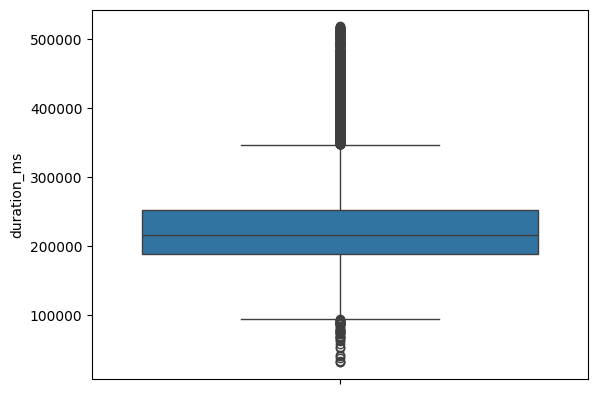

In [58]:
sns.boxplot(y=songs_data_cleaned.duration_ms);

In [59]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['duration_ms'] > 110000]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['duration_ms'] < 300000]

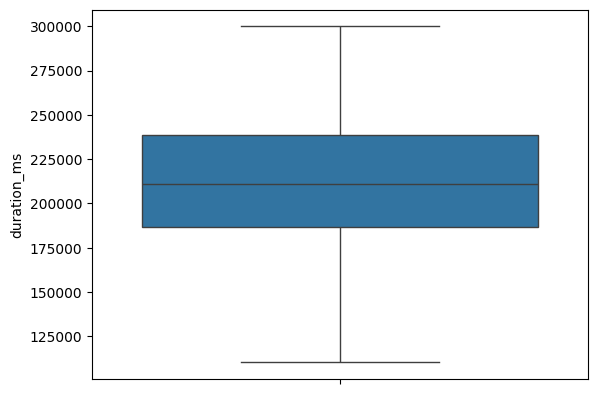

In [60]:
sns.boxplot(y=songs_data_cleaned.duration_ms);

In [61]:
print(songs_data_cleaned.shape)

(22384, 13)


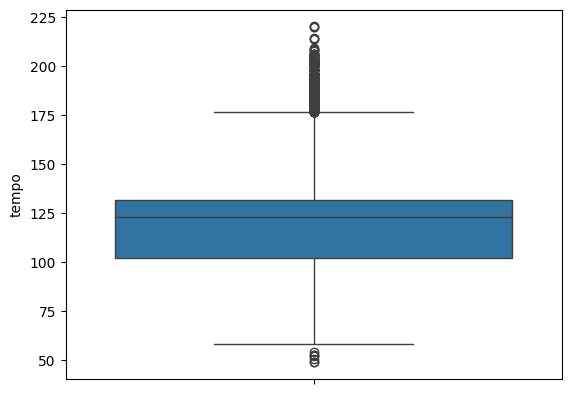

In [62]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [63]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] > 70]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] < 160]

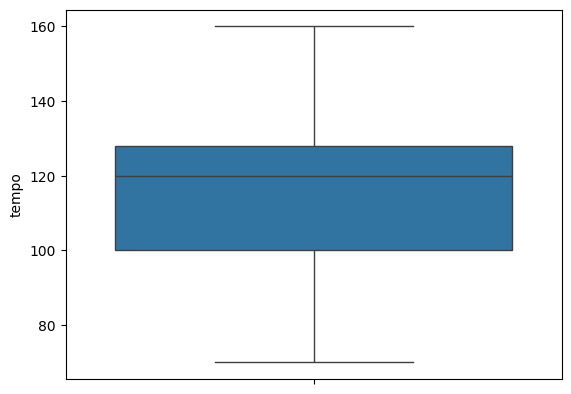

In [64]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [65]:
print(songs_data_cleaned.shape)

(20456, 13)


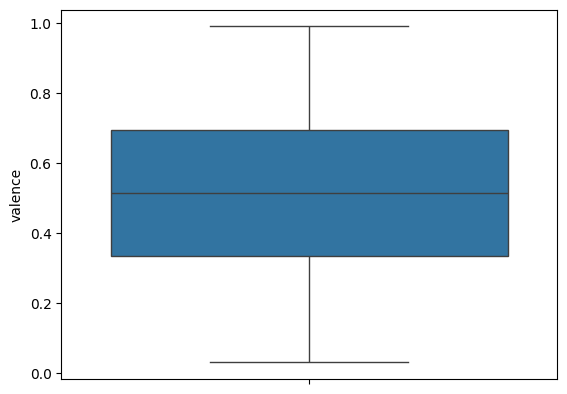

In [66]:
sns.boxplot(y=songs_data_cleaned.valence);

In [67]:
print(songs_data_cleaned.shape)

(20456, 13)


In [68]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,Pop Remix,pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,Pop Remix,pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,Pop Remix,pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,Pop Remix,pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,Pop Remix,pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 2. Feature Engineering

## Label Encoding

In [70]:
# first thing we do in feature engineering is that we need to transform the object types into numbers by using label encoding

In [71]:
songs_data_cleaned['genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [72]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
genre_encoded = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
songs_data_cleaned['genre']= genre_encoded.fit_transform(songs_data_cleaned['genre']) 
  
songs_data_cleaned['genre'].unique() 

array([2, 4, 5, 1, 3, 0])

In [73]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,Pop Remix,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,Pop Remix,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,Pop Remix,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,Pop Remix,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,Pop Remix,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [74]:
# Label encoding the 'playlist_name' column

# Create a label encoder object
playlist_encoded = preprocessing.LabelEncoder()

# Encode the 'playlist_name' column using the label encoder
songs_data_cleaned['playlist_name']= playlist_encoded.fit_transform(songs_data_cleaned['playlist_name'])

songs_data_cleaned['playlist_name'].unique()

# Display the first five rows of the updated DataFrame
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,292,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,292,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,292,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,292,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,292,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [75]:
# the next step is to encode the track id into numerical type data

In [76]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,292,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,292,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,292,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,292,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,292,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Creating New Features to improve accuracy 

These are all new features we tried. They did not seem to improve accuracy however. 

In [77]:
#songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] * songs_data_cleaned['energy']

In [78]:
#songs_data_cleaned['track_popularity_valence'] = songs_data_cleaned['track_popularity'] * songs_data_cleaned['valence']

In [79]:
#songs_data_cleaned['valence_dance'] = songs_data_cleaned['valence'] * songs_data_cleaned['danceability']

In [80]:
#songs_data_cleaned['speechiness_acousticness'] = songs_data_cleaned['speechiness'] * songs_data_cleaned['acousticness']

In [81]:
#songs_data_cleaned['track_popularity_energy'] = songs_data_cleaned['track_popularity'] * songs_data_cleaned['energy']

In [82]:
#songs_data_cleaned['valence_energy'] = songs_data_cleaned['valence'] * songs_data_cleaned['energy']

In [83]:
#songs_data_cleaned['tempo_valence'] = songs_data_cleaned['tempo'] * songs_data_cleaned['valence']

In [84]:
#songs_data_cleaned['loudness_instrumentalness'] = songs_data_cleaned['loudness'] * songs_data_cleaned['instrumentalness']

In [85]:
#songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] * songs_data_cleaned['energy']

In [86]:
#songs_data_cleaned.tempo.max()

In [87]:
#songs_data_cleaned['tempo_bin'] = pd.cut( songs_data_cleaned['tempo'], bins=[0, 40, 80, 120, 161], labels=[1, 2, 3, 4])

In [88]:
#songs_data_cleaned['tempo_bin'].unique()

In [89]:
#tempo_encoded = preprocessing.LabelEncoder() 
  
# Encode labels in column tempo. 
#songs_data_cleaned['tempo_bin']= tempo_encoded.fit_transform(songs_data_cleaned['tempo_bin']) 
  
#songs_data_cleaned['tempo_bin'].unique() 

In [90]:
#songs_data_cleaned['loudness_bin'] = pd.cut( songs_data_cleaned['loudness'], bins=[-60, -30, -10, 0], labels = [1,2,3])

In [91]:
#loudness_encoded = preprocessing.LabelEncoder() 
   
#songs_data_cleaned['loudness_bin']= tempo_encoded.fit_transform(songs_data_cleaned['loudness_bin']) 
  
#songs_data_cleaned['loudness_bin'].unique()

In [92]:
songs_data_cleaned.head()

,track_popularity,playlist_name,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,292,2,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,292,2,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,292,2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,292,2,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,292,2,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Splitting the Data into training and test data sets

In [93]:
# define the target and features

features = songs_data_cleaned.drop(['genre' ], axis=1)
target = songs_data_cleaned['genre']

In [94]:
features.head()

,track_popularity,playlist_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,292,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,292,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,292,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,292,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,292,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [95]:
features.shape

(20456, 12)

In [96]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre, dtype: int64

In [97]:
target.shape

(20456,)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.3,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [99]:
X_train.shape

(14319, 12)

In [100]:
X_test.shape

(6137, 12)

# 3. Developing the Machine Learning Model

We employed the classifier RandomForest for our Machine Learning Model.

In [101]:
# starting with the existing features and evaluating the models performance to decide if additional feature engineering is necessary

In [102]:
from sklearn.ensemble import RandomForestClassifier

# using the max_depth parameter to solve overfitting

aal_rf = RandomForestClassifier(max_depth=20, random_state=42)
  


# max_depth=2, n_estimators=30,
    #min_samples_split=3, max_leaf_nodes=5,
    #random_state=22
# reference: https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

In [103]:
aal_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [104]:
y_pred_rf = aal_rf.predict(X_test)

In [105]:
from sklearn import metrics

print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             aal_rf.predict(X_train))*100)
print('Testing Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             aal_rf.predict(X_test))*100)

# reference: https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

Training Accuracy :  99.47622040645297
Testing Accuracy :  67.15007332572918


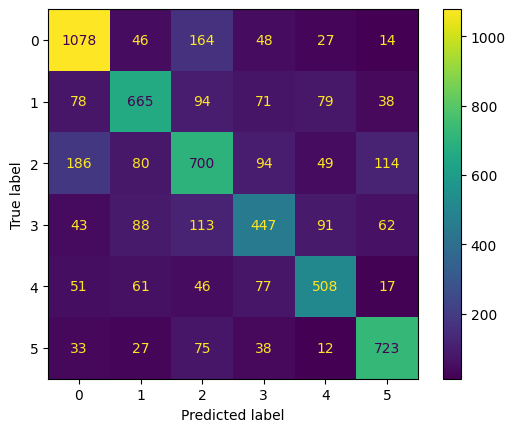

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=aal_rf.classes_)

disp.plot();

In [107]:
# accuracy for whole algorithm

In [108]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_rf)

0.6715007332572919

In [109]:
# Precision of the individual genre classifications

In [110]:
# reference: https://www.geeksforgeeks.org/machine-learning-model-evaluation/?ref=gcse_outind

from sklearn.metrics import precision_score
# Calculate precision for genres
# edm 
precision_genre_0 = precision_score(y_test, y_pred_rf, labels=[0], average='weighted')
print(precision_genre_0)
# latin
precision_genre_1 = precision_score(y_test, y_pred_rf, labels=[1], average='weighted')
print(precision_genre_1)
# pop
precision_genre_2 = precision_score(y_test, y_pred_rf, labels=[2], average='weighted')
print(precision_genre_2)
# r&b
precision_genre_3 = precision_score(y_test, y_pred_rf, labels=[3], average='weighted')
print(precision_genre_3)
# rap
precision_genre_4 = precision_score(y_test, y_pred_rf, labels=[4], average='weighted')
print(precision_genre_4)
# rock
precision_genre_5 = precision_score(y_test, y_pred_rf, labels=[5], average='weighted')
print(precision_genre_5)

0.7338325391422736
0.687693898655636
0.587248322147651
0.5767741935483871
0.6631853785900783
0.746900826446281


In [111]:
# we need to further distinguish the genres latin, pop and r&b 
# genres like rock and edm are more different and more easily distinguishable for the algorithm

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

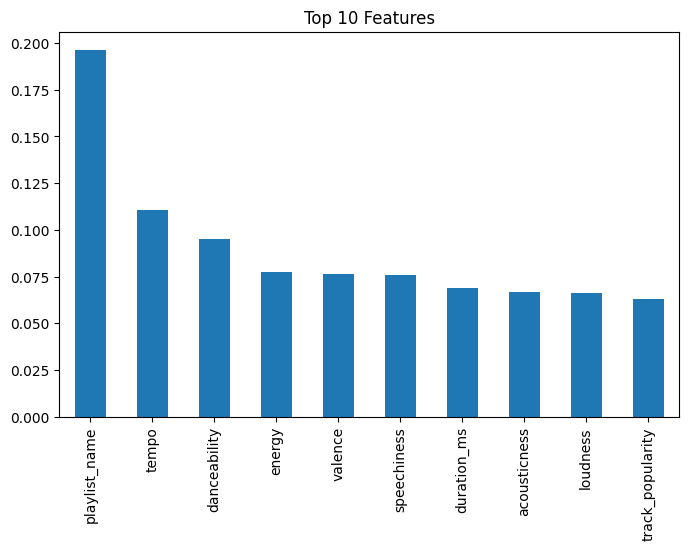

In [113]:
feature_importance_plot(aal_rf, X_train, n = 10)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score


def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

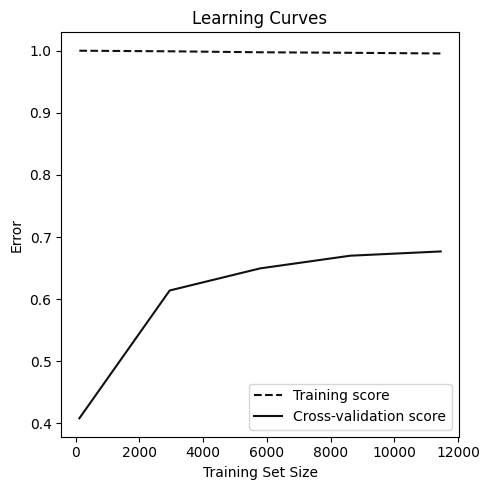

In [115]:
learning_curve_plot(aal_rf, X_train, y_train, scoring = 'accuracy')

# XGBoost

In [116]:

#!pip install xgboost

In [117]:
#from xgboost import XGBClassifier

#aal_xgb = XGBClassifier()

In [118]:
#aal_xgb.fit(X_train, y_train)

In [119]:
#y_pred_xgb = aal_xgb.predict(X_test)

In [120]:
#cm = confusion_matrix(y_test, y_pred_xgb)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              # display_labels=aal_xgb.classes_)

#disp.plot();

In [121]:
#precision_score(y_test, y_pred_xgb)

# 4. Evaluation